## Assignment 1

### VISHANTH HARI RAJ

**Question 1: Bass Noise-Robust Estimation**

Consider the data given in adoptionseries2_with_noise.xlsx. N(t) is in millions. So if N(t) = 0.05 that means there were 50000 adopters in period "t". These data correspond to the data reported in the second column (the "shuffled" data) on Assessing Primary Demand Slide 12. As we discussed in class, if the adoption series is noisy, the Bass Model estimates can be incorrect, which leads to serious forecasting error as depicted on Slide 13. The incorrectness is more with the "M" parameter rather than the "p" and "q" parameters, but because the three terms are interdependent, the incorrectness in the "M" parameter also leads to incorrectness in the "p" and "q" parameters. As a workaround, we can determine M from survey research or some other outside data, fix M to the value that was determined, and use the adoption series dataset to estimate just the "p" and "q". This requires the use of nonlinear regression as we saw in class.

For linear regression there are multiple good routines in Python (for example,   statsmodels.regression.linear_model.OLS, or sklearn.linear_model.LinearRegression), all being good enough. For nonlinear regression too there are multiple approaches but it is less obvious which one to use. My recommendation is to use "scipy.optimize.curve_fit".  Be aware that nonlinear regression routines are susceptible to local optima problems and unfortunately scipy.optimize.curve_fit particularly so, with the result that even simple rescaling of variables can cause it to produce incorrect predictions. See my note below on this issue.

The deliverables for this exercise are listed below. For the final deliverable numbers requested, round each number to three significant digits.


**1.1** Estimate "M", "p" and "q" from the adoption series dataset using the linear regression approach described on Slides 8 and 9. From  these values, compute the values of N(t) beyond t=14. Specifically, compute N(30). No writeup necessary, simply state your values of "M", "p", "q" and N(30).

In [1]:
import pandas as pd
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("adoptionseries2_with_noise.xlsx")
df["A(t)"] = df["N(t)"].cumsum().shift(1)
df["A(t)"][0] = 0
df["A(t)2"] = df["A(t)"]**2
df.head()

,t,N(t),A(t),A(t)2
0,1,0.123,0.000,0.000000
1,2,0.097,0.123,0.015129
2,3,0.171,0.220,0.048400
3,4,0.145,0.391,0.152881
4,5,0.238,0.536,0.287296


In [4]:
model1 = smf.ols(formula = 'df["N(t)"] ~ df["A(t)"] + df["A(t)2"]', data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:             df["N(t)"]   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     188.4
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.09e-09
Time:                        23:26:31   Log-Likelihood:                 23.404
No. Observations:                  14   AIC:                            -40.81
Df Residuals:                      11   BIC:                            -38.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0961      0.027      3.611      

In [5]:
a = result1.params['Intercept']
b = result1.params['df["A(t)"]']
c = result1.params['df["A(t)2"]']

In [6]:
p = ((b**2 - 4*a*c)**(.5) - b)/2
q = ((b**2 - 4*a*c)**(.5) + b)/2
M = -q/c

In [7]:
print(round(p,5),round(q,5),round(M,5))

0.00279 0.2141 34.40473


In [9]:
for i in range(14,30):
    e = df['A(t)'].loc[i - 1] + df['N(t)'].loc[i - 1]
    df.loc[i] = [i + 1,
                 M * p + (q - p) * e + (-q / M) * e ** 2,
                 df['A(t)'].loc[i - 1] + df['N(t)'].loc[i - 1],
                 (df['A(t)'].loc[i - 1] + df['N(t)'].loc[i - 1])**2]
    
# df['A(t)'].loc[i - 1] + df['N(t)'].loc[i - 1] = e 
# N(t) = Mp + q-p(A(t)) + (-q/M) * A(t)^2 
# A(t) = N(t-1) + N(t-2) + ...+ N(0)


In [114]:
df

,t,N(t),A(t),A(t)2
0,1.0,0.123000,0.000000,0.000000
1,2.0,0.097000,0.123000,0.015129
2,3.0,0.171000,0.220000,0.048400
3,4.0,0.145000,0.391000,0.152881
4,5.0,0.238000,0.536000,0.287296
5,6.0,0.214000,0.774000,0.599076
6,7.0,0.333000,0.988000,0.976144
7,8.0,0.314000,1.321000,1.745041
8,9.0,0.466000,1.635000,2.673225
9,10.0,0.455000,2.101000,4.414201


In [115]:
print('M: ', round(M,3))
print('p: ', round(p,3))
print('q: ', round(q,3))
print('N(30): ', round(df['N(t)'].loc[29],3))

M:  34.405
p:  0.003
q:  0.214
N(30):  0.974


**1.2** Assume M is fixed at M=100. Estimate "p" and "q" from the adoption series dataset from period 1 to 14 using the nonlinear regression approach, again based on the formula at the top of slide 8. See Question Q5 below for comments on what makes the model nonlinear when M is fixed, but linear when M is not fixed (as in Q1(1) above).   No writeup necessary, simply state your values of "p", "q" . 

In [10]:
df2 = df[0:14].copy()
df2

,t,N(t),A(t),A(t)2
0,1.0,0.123,0.000,0.000000
1,2.0,0.097,0.123,0.015129
2,3.0,0.171,0.220,0.048400
3,4.0,0.145,0.391,0.152881
4,5.0,0.238,0.536,0.287296
5,6.0,0.214,0.774,0.599076
6,7.0,0.333,0.988,0.976144
7,8.0,0.314,1.321,1.745041
8,9.0,0.466,1.635,2.673225
9,10.0,0.455,2.101,4.414201


In [12]:
M = 100
def bass_model(x, p, q):
    return (p+(q/M)*(x))*(M-x)

In [13]:
popt, pcov = curve_fit(bass_model, df2["A(t)"], df2["N(t)"], p0 = [0.02,0.5])

In [14]:
popt

array([0.00106073, 0.1936844 ])

In [15]:
p = popt[0]
q = popt[1]

In [16]:
print('p: ', round(popt[0],5))
print('q: ', round(popt[1],5))

p:  0.00106
q:  0.19368


**1.3** Using M=100 and the estimated values of "p" and "q" from Step 2 above, forecast into the future beyond period 14. Compute the value of N(30). No writeup necessary. Simply state the N(30) value that you got. 

In [17]:
for i in range(14,30):
    e = df2['A(t)'].loc[i - 1] + df2['N(t)'].loc[i - 1]
    df2.loc[i] = [i + 1,
                 M * p + (q - p) * e + (-q / M) * e ** 2,
                 df2['A(t)'].loc[i - 1] + df2['N(t)'].loc[i - 1],
                 (df2['A(t)'].loc[i - 1] + df2['N(t)'].loc[i - 1])**2]

In [18]:
df2

,t,N(t),A(t),A(t)2
0,1.0,0.123000,0.000000,0.000000
1,2.0,0.097000,0.123000,0.015129
2,3.0,0.171000,0.220000,0.048400
3,4.0,0.145000,0.391000,0.152881
4,5.0,0.238000,0.536000,0.287296
5,6.0,0.214000,0.774000,0.599076
6,7.0,0.333000,0.988000,0.976144
7,8.0,0.314000,1.321000,1.745041
8,9.0,0.466000,1.635000,2.673225
9,10.0,0.455000,2.101000,4.414201


In [19]:
print('N(30): ', round(df2['N(t)'].loc[29],3))

N(30):  4.89


**1.4** Continue to assume M=100. Estimate "p" and "q" from the adoption series from period 1 to 14, this time using the Continuous Bass Model of  Slide 21.  You can do this via nonlinear regression in python creating a formula based on the expression at the bottom of Slide 21. [Alternatively you can set up an optimization calculation to minimize the Sum of Squared Errors(SSE), like on Slides 23-25, shown in the spreadsheet adoptionseries1_continuous_bass_solved.xls. In this spreadsheet if we start with p=0.001, q=0.5, M=100 (the values you see when you see when you open the spreadsheet), and run SOLVER to optimize for p,q,M, then we get estimates as p=0.000596, q=0.418653, M=123.4005.] For this HW question, because M is already assumed to be M=100, we optimize  for only p and q,  fixing M at 100. Use your estimated values of p and q to estimate the value of N(30) under the Continuous Bass Model. No writeup necessary. Simply state your values of p, q, and N(30). 

In [20]:
df3 = df[0:14].copy()
df3

,t,N(t),A(t),A(t)2
0,1.0,0.123,0.000,0.000000
1,2.0,0.097,0.123,0.015129
2,3.0,0.171,0.220,0.048400
3,4.0,0.145,0.391,0.152881
4,5.0,0.238,0.536,0.287296
5,6.0,0.214,0.774,0.599076
6,7.0,0.333,0.988,0.976144
7,8.0,0.314,1.321,1.745041
8,9.0,0.466,1.635,2.673225
9,10.0,0.455,2.101,4.414201


In [21]:
m = 100

def nonlinear_n_cont(x, p, q):
    return (m*((1 - np.exp(-(p+q)*x))/(1 + (q/p)*np.exp(-(p+q)*x))) - m*((1 - np.exp(-(p+q)*(x-1)))/(1 + (q/p)*np.exp(-(p+q)*(x-1)))))


In [22]:
popt2 , pcov2 = curve_fit(nonlinear_n_cont, df3["t"], df3["N(t)"], p0 = [0.02,0.5])
popt2

array([0.00095545, 0.17857014])

In [23]:
p_c = popt2[0]
q_c = popt2[1]

In [24]:
print('p: ', round(p_c,6))
print('q: ', round(q_c,5))
print(M)

p:  0.000955
q:  0.17857
100


In [25]:
for i in range(14,30):
    df3.loc[i] = [i + 1,
                  M * ((1 - np.exp(-(p_c + q_c)*(i + 1)))/(1 + q_c/p_c * np.exp(-(p_c + q_c)*(i + 1)))) - \
                  M*((1 - np.exp(-(p_c + q_c)*(i)))/(1 + q_c/p_c * np.exp(-(p_c + q_c)*(i)))),
                  df3['A(t)'].loc[i - 1] + df3['N(t)'].loc[i - 1],
                  (df3['A(t)'].loc[i - 1] + df3['N(t)'].loc[i - 1])**2]

In [26]:
df3

,t,N(t),A(t),A(t)2
0,1.0,0.123000,0.000000,0.000000
1,2.0,0.097000,0.123000,0.015129
2,3.0,0.171000,0.220000,0.048400
3,4.0,0.145000,0.391000,0.152881
4,5.0,0.238000,0.536000,0.287296
5,6.0,0.214000,0.774000,0.599076
6,7.0,0.333000,0.988000,0.976144
7,8.0,0.314000,1.321000,1.745041
8,9.0,0.466000,1.635000,2.673225
9,10.0,0.455000,2.101000,4.414201


In [27]:
print('N(30): ', round(df3['N(t)'].loc[29],3))

N(30):  4.504


**Question Q2 (Optional question for class participation credit)**

Consider M to be 100. Plot the N(t) curve as specified by the Bass Model for a broad range of value pairs for p and q, with p ranging from 0.005 to 0.08 and  q ranging from 0.1 to 0.8. Use the Discrete Bass model for this because it is simpler and leads to the same qualitative conclusions for this question as the Continuous Bass.  From these plots, make some summary observations on how the absolute and relative values of p and q influence different  aspects of the N(t) curve , like the shape, height, slope and decay duration. The motivation for this question is that if you know how p and q affect the shape of the curve, then this should allow you, by reverse-logic, to guess the value of p and q if you see the shape of the curve. Make sure you scale the plots the same way so that comparisons are easy to make. In your submitted response,  reproduce some of your plots to illustrate your summary observations. You will probably generate many plots to get an understanding of how p and q affect the N(t) curve. You definitely do not have to reproduce all of those plots in your submission, just enough to illustrate your summary observations. Suggestions on how to proceed: You need to do what we did on Slide 6 but for a larger set. Specifically, you consider different sets of values of p,q. For each set, you compute the true values N(1), N(2)...through N(Tmax) for some moderately large value of Tmax like 50, and inspect the curve. These are taken to be the true values from the Bass model. You do this for different values of p,q, then plot the curves and then recognize some general patterns.

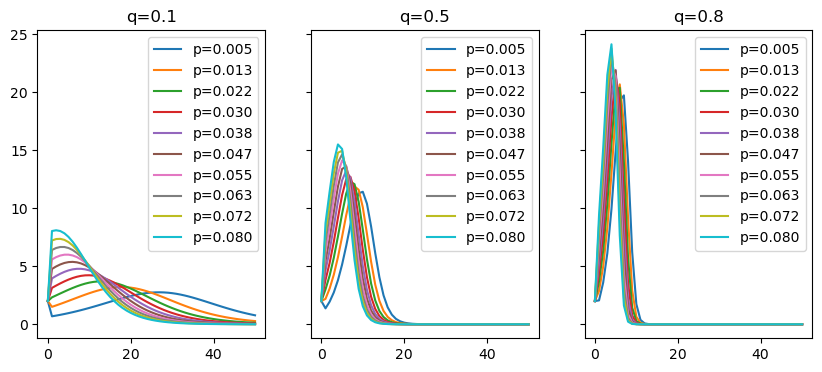

In [28]:
# Set model parameters
M = 100
T = 50
p_values = np.linspace(0.005, 0.08, 10)
q_values = np.linspace(0.1, 0.8, 5)

# Initialize arrays to store A(t) and N(t) values
N_values = np.zeros((len(p_values), len(q_values), T+1))
A_values = np.zeros((len(p_values), len(q_values), T+1))

# Loop over p and q values and compute N(t) values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        N = np.zeros(T+1)
        A = np.zeros(T+1)
        N[0] = M * 0.02  # initial number of adopters
        A[0] = 0
        for t in range(1, T+1):
            A[t] = A[t-1] + N[t-1]
            N[t] = M * p + (q - p) * A[t] + (-q / M) * A[t] ** 2
        A_values[i,j,:] = A
        N_values[i,j,:] = N

# Plot N(t) curves for selected p and q values
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharex=True, sharey=True)
for ax, (i, j) in zip(axs.flat, [(3, 0), (0, 2), (4, 4)]):
    ax.set_title(f"q={q_values[j]:.1f}")
    for k in range(len(p_values)):
        ax.plot(N_values[k,j,:], label=f"p={p_values[k]:.3f}")
    ax.legend()
plt.show()

**Question Q3 (Optional question for class participation credit)**

Comparing Slides 12,13 with Slides 14,15, we see that the estimation error of M is larger  in the first case than in the second case, and consequently the forecasted curve beyond period 15 is much further from the true curve in the first case than in the second case.  What differences in the two time series or the nature of the noise (up to period 15) lead to the difference  described in the previous sentence. The main point of this question is not to tie you specifically to the examples on the slides but to make you think more broadly about the situations in the data or problem that lead to M being estimated poorly.  If you want, you can experiment with different values of p,q, different levels of noise and compare the forecasted curve with noise with the forecasted curve without noise as slides 14 and 16 do, or compute the magnitude of error in the estimated value of M.  This question is open ended, with a response ranging from 2 sentences to 3 pages. Points  will be accrued in proportion to the depth of analysis.

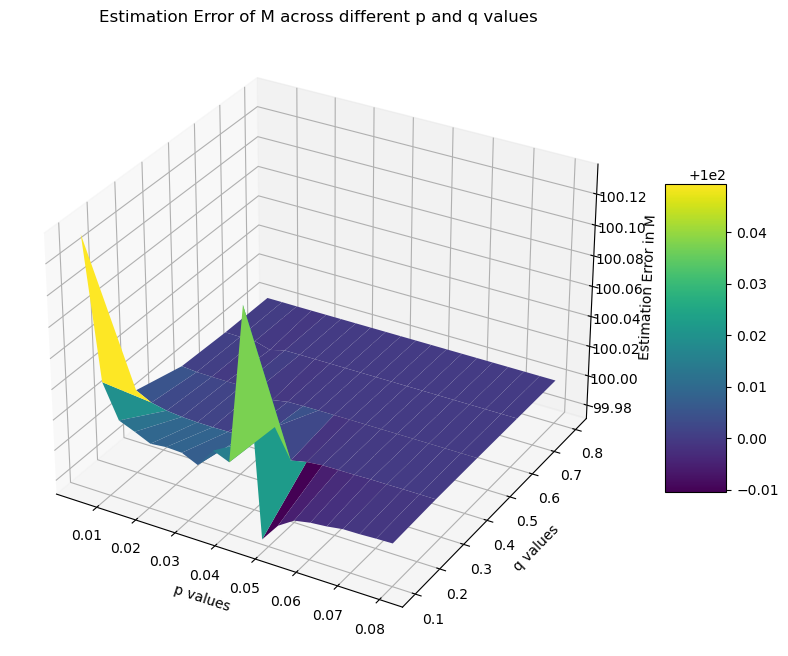

In [52]:
# The provided code is designed to simulate the Bass diffusion process for a range of p and q values, 
# add noise to the adoption series, estimate the parameters from this noisy data, and then visualize 
# the estimation error in M across different values of p and q. We will now write this code segment.

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set model parameters
M = 100  # Market size
T_max = 50  # Max time period
p_values = np.linspace(0.005, 0.08, 20)  # Range of p values
q_values = np.linspace(0.1, 0.8, 5)  # Range of q values
noise_level = 0.1  # 10% noise

# Function to generate the true values of N(t) based on the Bass model
def generate_true_values(M, p, q, T_max):
    N = np.zeros(T_max + 1)
    A = np.zeros(T_max + 1)
    for t in range(1, T_max + 1):
        A[t] = A[t-1] + N[t-1]
        N[t] = (M * p) + ((q - p) * A[t]) - ((q / M) * A[t]**2)
    return N, A

# Function to add noise to the adoption data
def add_noise(N, T_max, noise_level):
    noise = 1 + np.random.uniform(-noise_level, noise_level, T_max + 1)
    N_noisy = N * noise
    return N_noisy

# Initialize a grid to store estimation errors for M
estimation_errors = np.zeros((len(p_values), len(q_values)))

# Iterate over all combinations of p and q values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        # Generate the true values of N(t) without noise
        N, A = generate_true_values(M, p, q, T_max)
        
        # Add noise to the first 15 values of N(t)
        N_noisy = add_noise(N, T_max, noise_level)
        N_noisy[15:] = N[15:]  # Keep the true values beyond t=14
        
        # Perform nonlinear regression to estimate p and q with fixed M
        # Prepare the data for curve_fit function
        t_data = np.arange(1, T_max + 1)
        N_data = N_noisy[1:]
        A_data = A[:-1]
        
        # Perform the curve fit
        popt, _ = curve_fit(lambda t, p, q: bass_model(t, p, q, M), t_data[:14], N_data[:14], p0=[p, q])
        p_est, q_est = popt
        
        # Estimate M using the estimated p and q, and compare it to the true M
        A_t = np.sum(N_noisy[:14])  # Cumulative adopters up to t=14
        N_t = N_noisy[14]  # N(t) at t=15
        M_est = N_t / (p_est + (q_est - p_est) * A_t - (q_est * A_t**2))
        
        # Store the absolute estimation error for M
        estimation_errors[i, j] = np.abs(M_est - M)

# Plotting the estimation errors
p_grid, q_grid = np.meshgrid(p_values, q_values, indexing='ij')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_grid, q_grid, estimation_errors, cmap='viridis')
ax.set_xlabel('p values')
ax.set_ylabel('q values')
ax.set_zlabel('Estimation Error in M')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Estimation Error of M across different p and q values')
plt.show()


**Question Q4 (Optional question for class participation credit)**

A model is a linear regression model when the number of predictors (including the constant column of 1s) is equal to the number of parameters to be estimated and there is a one-to-one mapping between the coefficients and the parameters to be estimated. If this condition fails to hold then it is a nonlinear regression. Linear regression does not necessarily mean that the plot between X and expected Y looks like a straight line.  In the equation N(t) = M*p + (q-p)*A(t) - (q/M)*A^2(t), if M is not fixed then there are three parameters (p,q,M) and three predictors including the intercept, and also there is a  one-to-one mapping, so this is a linear regression. In that same equation, if M is fixed then there are only two parameters and still three predictors, and so it becomes a nonlinear regression. Note, however, that in some cases, it is possible to modify the expression in a nonlinear regression situation to bring it to a linear regression situation, and indeed that modification is possible in the case of N(t) = M*p + (q-p)*A(t) - (q/M)*A^2(t) with M fixed as we do in Question Q1.2. What is that modification? Another way to ask this question: What are the predictors you will use in the post-modification linear regression? How do you get the values of p and q from the coefficients of this linear regression? Run the corresponding linear regression and verify that you get the same p and q values as in Question Q1.2. This question is about the discrete Bass and not continuous Bass.

In [50]:
import statsmodels.api as sm
df = pd.read_excel('adoptionseries2_with_noise.xlsx')
df['A'] = 0


df['A'] = df['N(t)'].cumsum()

df['A'] = df['A'].shift(fill_value=0)

df['R'] = 100 - df['A']
df['n/r'] = df['N(t)']/df['R']

df['A'] /=100



# Create a linear regression model on the train set using smf.ols
model = smf.ols(formula='Q("n/r") ~ A ', data=df).fit()
print(model.summary())
# Extract coefficients
beta_0 = model.params[0]
beta_1 = model.params[1]


# Retrieve p and q values
M = 100  # Assuming M is fixed
p = beta_0 
q = beta_1 

print("Estimated values of p and q:")
print("p:", beta_0)
print("q:", q)

                            OLS Regression Results                            
Dep. Variable:               Q("n/r")   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     417.9
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.08e-10
Time:                        22:15:35   Log-Likelihood:                 87.302
No. Observations:                  14   AIC:                            -170.6
Df Residuals:                      12   BIC:                            -169.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.000      5.201      0.0

**Question Q5 (Optional question for class participation credit)**

For as many of the questions Q1 through Q4 above that you attempted, use a generative AI tool to produce python or R code. The code should be able to solve the HW problem exactly, it should not be code that solves some different, though related, problem. For each question, submit the following: (A) The prompt or sequence of prompts that you entered into the generative tool, (B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot), (C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.


ChatGPT: Refer in PDF
